In [2]:
import nltk

# modules that are required:
# 1 brown
# 2 gutenberg
# 3 max_ne_chunker
# 4 movie_reviews
# 5 product_reviews_1
# 6 punkt
# 7 treebank
# 8 twitter_samples
# 9 universal_tagset
# 10 webtext
# 11 wordnet
# 12 words
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
import matplotlib.pyplot as plt

# Tokenization

In [4]:
from nltk.corpus import twitter_samples as ts

In [5]:
ts.fileids()

['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']

In [6]:
samples_tw = ts.strings('tweets.20150430-223406.json')

In [7]:
samples_tw[500]

'RT @Battsby: Ed Miliband appears to be dying on his lying arse here. \n\n#bbcqt \n\nThe spray-tanned mask is slipping.'

In [8]:
from nltk.tokenize import word_tokenize as wtoken

In [9]:
wtoken(samples_tw[500])

['RT',
 '@',
 'Battsby',
 ':',
 'Ed',
 'Miliband',
 'appears',
 'to',
 'be',
 'dying',
 'on',
 'his',
 'lying',
 'arse',
 'here',
 '.',
 '#',
 'bbcqt',
 'The',
 'spray-tanned',
 'mask',
 'is',
 'slipping',
 '.']

In [10]:
from nltk.tokenize import wordpunct_tokenize as wtoken2

In [11]:
wtoken2(samples_tw[500])

['RT',
 '@',
 'Battsby',
 ':',
 'Ed',
 'Miliband',
 'appears',
 'to',
 'be',
 'dying',
 'on',
 'his',
 'lying',
 'arse',
 'here',
 '.',
 '#',
 'bbcqt',
 'The',
 'spray',
 '-',
 'tanned',
 'mask',
 'is',
 'slipping',
 '.']

In [12]:
from nltk import regexp_tokenize

In [13]:
patn = '\w+'
regexp_tokenize(samples_tw[500],patn)

['RT',
 'Battsby',
 'Ed',
 'Miliband',
 'appears',
 'to',
 'be',
 'dying',
 'on',
 'his',
 'lying',
 'arse',
 'here',
 'bbcqt',
 'The',
 'spray',
 'tanned',
 'mask',
 'is',
 'slipping']

In [14]:
#regular expression that detects words along with a few punctuation characters:
patn = '\w+|[!,\-,]' 
regexp_tokenize(samples_tw[500],patn)

['RT',
 'Battsby',
 'Ed',
 'Miliband',
 'appears',
 'to',
 'be',
 'dying',
 'on',
 'his',
 'lying',
 'arse',
 'here',
 'bbcqt',
 'The',
 'spray',
 '-',
 'tanned',
 'mask',
 'is',
 'slipping']

# Stemming

In [15]:
from nltk.stem import PorterStemmer

In [16]:
stemming = PorterStemmer()
print(stemming.stem("enjoying"),stemming.stem("enjoys"),stemming.stem("enjoyable"))

enjoy enjoy enjoy


In [17]:
# Stemming does not always produce a stem that is a word by itself, as shown in the following example:
print(stemming.stem("variation"),stemming.stem("variate"))

variat variat


In [18]:
#we can create custom stemmers, using the following regular expressions:
from nltk.stem import RegexpStemmer
regexp_stemmer = RegexpStemmer("able$|ing$",min=4)

In [19]:
print(regexp_stemmer.stem("flyable"),regexp_stemmer.stem("flying"))

fly fly


# Removing stop words

In [20]:
from nltk.corpus import stopwords
sw_l = stopwords.words('english')

In [21]:
print(len(sw_l),sw_l[20:40])

179 ['himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this']


In [22]:
example_text = "This is an example sentence to test stopwords"
example_text_without_stopwords=[word for word in example_text.split() if word not in sw_l]
example_text_without_stopwords

['This', 'example', 'sentence', 'test', 'stopwords']

In [23]:
from nltk.corpus import gutenberg
words_in_hamlet = gutenberg.words('shakespeare-hamlet.txt')
words_in_hamlet_without_sw = [word for word in words_in_hamlet if word not in sw_l]

In [24]:
len(words_in_hamlet_without_sw)*100.0/len(words_in_hamlet)

69.26124197002142

In [25]:
# gutenberg content
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [26]:
bible = gutenberg.words('bible-kjv.txt')
words_in_bible_without_sw = [word for word in bible if word not in sw_l]

In [27]:
len(words_in_bible_without_sw)*100.0/len(bible)

62.6017410508443

In [28]:
len(words_in_bible_without_sw)

632687

In [29]:
vocabulary = set(words_in_bible_without_sw)
len(vocabulary)

13647

In [30]:
frequency_dist = nltk.FreqDist(words_in_bible_without_sw)
large_words = dict([(k,v) for k,v in frequency_dist.items() if len(k)>3])
frequency_dist = nltk.FreqDist(large_words)
sorted(frequency_dist,key=frequency_dist.__getitem__,reverse=True)[0:30]

['shall',
 'unto',
 'LORD',
 'thou',
 'said',
 'thee',
 'upon',
 'Israel',
 'king',
 'hath',
 'people',
 'came',
 'house',
 'come',
 'children',
 'land',
 'also',
 'shalt',
 'hand',
 'made',
 'went',
 'saying',
 'Then',
 'even',
 'saith',
 'every',
 'things',
 'sons',
 'Lord',
 'David']

In [31]:
from wordcloud import WordCloud

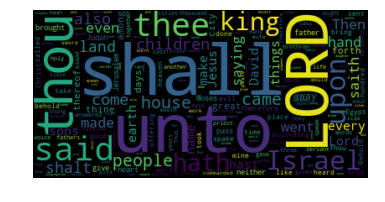

In [32]:
wcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [33]:
emma = gutenberg.words('austen-emma.txt')
words_in_emma_without_sw = [word for word in emma if word not in sw_l]

In [34]:
print("no stop words ratio:",len(words_in_emma_without_sw)*100.0/len(emma),"\nvocabulary:",len(set(words_in_emma_without_sw)))

no stop words ratio: 58.33277034927531 
vocabulary: 7682


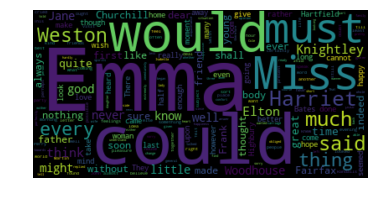

In [35]:
frequency_dist = nltk.FreqDist(words_in_emma_without_sw)
large_words = dict([(k,v) for k,v in frequency_dist.items() if len(k)>3])
frequency_dist = nltk.FreqDist(large_words)
wcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Exploratory analysis of text

In [36]:
from nltk.corpus import webtext
webtext_sentences = webtext.sents('firefox.txt')
# Firefox discussion forum (firefox.txt)

In [37]:
webtext_sentences = webtext.sents('firefox.txt')
webtext_words = webtext.words('firefox.txt')
print(len(webtext_sentences),len(webtext_words))

1142 102457


In [38]:
vocabulary = set(webtext_words)
len(vocabulary)

8296

In [39]:
frequency_dist = nltk.FreqDist(webtext_words)
sorted(frequency_dist,key=frequency_dist.__getitem__,reverse=True)[0:30]

['.',
 'in',
 'to',
 '"',
 'the',
 "'",
 'not',
 '-',
 'when',
 'on',
 'a',
 'is',
 't',
 'and',
 'of',
 '(',
 'page',
 'for',
 'with',
 ')',
 'window',
 'Firefox',
 'does',
 'from',
 'open',
 ':',
 'menu',
 'should',
 'bar',
 'tab']

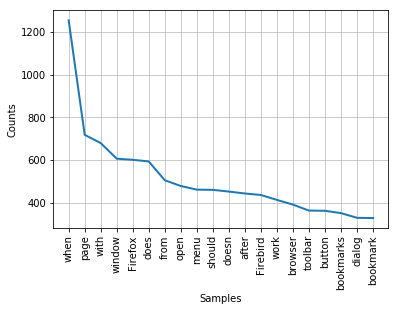

In [40]:
large_words = dict([(k,v) for k,v in frequency_dist.items() if len(k)>3])
frequency_dist = nltk.FreqDist(large_words)
frequency_dist.plot(20,cumulative=False)
plt.show()

In [41]:
!pip install wordcloud

In [42]:
from wordcloud import WordCloud

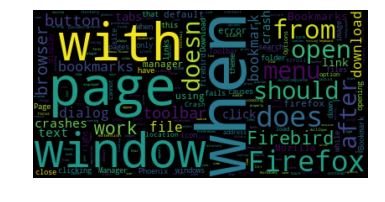

In [43]:
wcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [44]:
# without stopwords
words_in_webtext_without_sw = [word for word in webtext_words if word not in sw_l]


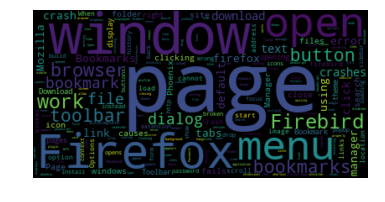

In [45]:
frequency_dist2 = nltk.FreqDist(words_in_webtext_without_sw)
large_words2 = dict([(k,v) for k,v in frequency_dist2.items() if len(k)>3])
frequency_dist3 = nltk.FreqDist(large_words2)
wcloud = WordCloud().generate_from_frequencies(frequency_dist3)
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# POS tagging
#### categorizing the words in a sentence into specific syntactic or grammatical functions
* VERB: Verbs (all tenses and modes)
* NOUN: Nouns (common and proper)
* PRON: Pronouns
* ADJ: Adjectives
* ADV: Adverbs
* ADP: Adpositions (prepositions and postpositions)
* CONJ: Conjunctions
* DET: Determiners
* NUM: Cardinal numbers
* PRT: Particles or other function words
* X-other: Foreign words, typos, abbreviations
* .: Punctuation

In [46]:
from nltk.corpus import brown
brown.fileids()[:3]

['ca01', 'ca02', 'ca03']

In [47]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [48]:
brown.words(categories='adventure')

['Dan', 'Morgan', 'told', 'himself', 'he', 'would', ...]

In [49]:
brown.words(fileids=['ca01'])

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [50]:
brown.sents(categories=['adventure', 'adventure'])

[['Dan', 'Morgan', 'told', 'himself', 'he', 'would', 'forget', 'Ann', 'Turner', '.'], ['He', 'was', 'well', 'rid', 'of', 'her', '.'], ...]

In [51]:
brown.tagged_words()[:10]

[('The', 'AT'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('Grand', 'JJ-TL'),
 ('Jury', 'NN-TL'),
 ('said', 'VBD'),
 ('Friday', 'NR'),
 ('an', 'AT'),
 ('investigation', 'NN'),
 ('of', 'IN')]

In [52]:
text1 = nltk.word_tokenize("I left the room")
text2 = nltk.word_tokenize("Left of the room")
nltk.pos_tag(text1,tagset='universal')

[('I', 'PRON'), ('left', 'VERB'), ('the', 'DET'), ('room', 'NOUN')]

In [53]:
nltk.pos_tag(text2,tagset='universal')

[('Left', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('room', 'NOUN')]

In [54]:
example_sent = nltk.word_tokenize("The company is located in South Africa")
example_sent

['The', 'company', 'is', 'located', 'in', 'South', 'Africa']

In [55]:
tagged_sent = nltk.pos_tag(example_sent)
tagged_sent

[('The', 'DT'),
 ('company', 'NN'),
 ('is', 'VBZ'),
 ('located', 'VBN'),
 ('in', 'IN'),
 ('South', 'NNP'),
 ('Africa', 'NNP')]

In [56]:
print(nltk.ne_chunk(tagged_sent))

(S
  The/DT
  company/NN
  is/VBZ
  located/VBN
  in/IN
  (GPE South/NNP Africa/NNP))


# QURAN

In [93]:
# http://www.gutenberg.org/cache/epub/3434/pg3434.txt
# download and play
k_path = 'C:\\datasets\\pg3434.txt'

In [98]:
file = open(k_path, mode='r', encoding="utf8") # 'r' is to read
text = file.read()
file.close()

In [103]:
print(text.split()[1000:1030])

['course,', 'the', 'prophet', 'par', 'excellence,', 'and', 'the', 'Koran', 'is', 'regarded', 'by', 'the', 'orthodox', 'as', 'nothing', 'less', 'than', 'the', 'eternal', 'utterance', 'of', 'Allah.', 'The', 'eulogy', 'pronounced', 'by', 'Carlyle', 'on', 'Muhammed', 'in']


In [104]:
words_in_koran_without_sw = [word for word in text.split() if word not in sw_l]

In [106]:
print("no stop words ratio:",len(words_in_koran_without_sw)*100.0/len(text.split()),"\nvocabulary:",len(set(words_in_koran_without_sw)))

no stop words ratio: 56.113031787189094 
vocabulary: 23415


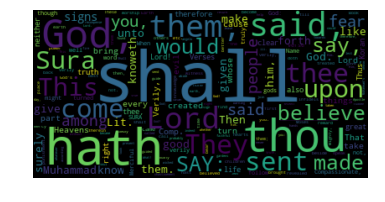

In [107]:
frequency_dist = nltk.FreqDist(words_in_koran_without_sw)
large_words = dict([(k,v) for k,v in frequency_dist.items() if len(k)>3])
frequency_dist = nltk.FreqDist(large_words)
wcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

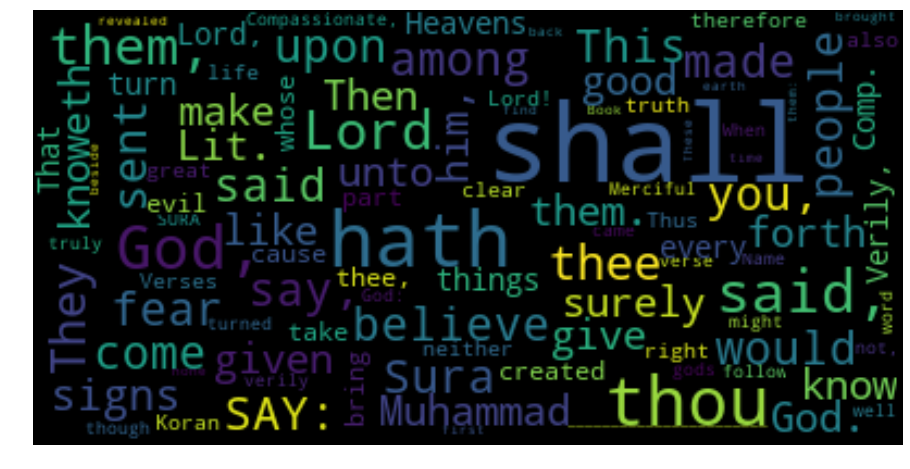

In [115]:
wcloud = WordCloud(max_font_size=50, max_words=100).generate_from_frequencies(frequency_dist)
plt.figure(figsize=[16,8])
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [121]:
frequency_dist['Muhammad']

201

In [122]:
frequency_dist['Jewish']

33

In [126]:
print('angel freq:',frequency_dist['angel'],'\nAngel freq:',frequency_dist['Angel'])

angel freq: 12 
Angel freq: 6
